#Game of Life

In [7]:
!pip install celluloid


In [24]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
from graphviz import Digraph

In [9]:
import numpy as np
from celluloid import Camera
import matplotlib.pyplot as plt

Conway's life-step is implemented below:

In [11]:
def evolve(lattice):
    """Conway's Game of life one-time evolution"""

    x = np.shape(lattice)[0]
    y = np.shape(lattice)[1]
    latticefinal = np.copy(lattice) #without this line we have a maze generator!!!!!
    for i in range(0,x):
        for j in range(0,y):
            sum = 0
            for k in [-1,0,1]:
                for l in [-1,0,1]:
                    if not (k ==0 and l ==0):     
                        sum = sum + lattice[(i+k)%x][(j+l)%y]            
            if lattice[i][j] == 0:
                if sum == 3: 
                    latticefinal[i][j] = 1 #reproduction 
            elif lattice[i][j] == 1:
                if sum > 3: 
                    latticefinal[i][j] = 0 #overpopulation
                elif sum in [2,3]: 
                    latticefinal[i][j] = 1 #stasis
                elif sum in [0,1]: 
                    latticefinal[i][j] = 0 #underpopulation
    return latticefinal

In [12]:
def evolvemap(lattice):
    """Conway's Game of life tracing the transition states 
    generated by the present configuration

    notice: 

    1 - stasis
    2 - overpopulation
    3 - underpopulation
    4 - reproduction
    0 - nothingness
    
    """
    x = np.shape(lattice)[0]
    y = np.shape(lattice)[1]
    lattice2 = np.copy(lattice) 
    statemap = np.copy(lattice)
    for i in range(0,x):
        for j in range(0,y):
            sum = 0
            for k in [-1,0,1]:
                for l in [-1,0,1]:
                    if not (k ==0 and l ==0):     
                        sum = sum + lattice[(i+k)%x][(j+l)%y]            
            if lattice[i][j] == 0:
                if sum == 3: 
                    lattice2[i][j] = 1 #reproduction 
                    statemap[i][j] = 4
            elif lattice[i][j] == 1:
                if sum > 3: 
                    lattice2[i][j] = 0 #overpopulation
                    statemap[i][j] = 2
                elif sum in [2,3]: 
                    lattice2[i][j] = 1 #stasis
                    statemap[i][j] = 1
                elif sum in [0,1]: 
                    lattice2[i][j] = 0 #underpopulation
                    statemap[i][j] = 3
    return lattice2, statemap

In [13]:
def generate_lattice(n,p):
    lattice = np.zeros([n,n], dtype='int')
    for i in range(0,n):
        for j in range(0,n):
            if np.random.uniform() < p:
                lattice[i,j]=1
    return lattice

def generate_lattice_s(n,m,p):
    lattice = np.zeros([n,m], dtype='int')
    for i in range(0,n):
        for j in range(0,m):
            if np.random.uniform() < p:
                lattice[i,j]=1
    return lattice

def generate_lattice_pq(n,p,q):
    lattice = np.zeros([n,n], dtype='int')
    for i in range(0,n):
        for j in range(0,n):
            if i > p and i < q and j > p and j < q:
                lattice[i,j]=1
    return lattice

def generate_lattice_pq_s(n,m,p,q):
    lattice = np.zeros([n,m], dtype='int')
    for i in range(0,n):
        for j in range(0,m):
            if i > p and i < q and j > p and j < q:
                lattice[i,j]=1
    return lattice

In [ ]:
#X =  generate_lattice_pq(31,11,15)

In [17]:
X =  generate_lattice_pq_s(25,20,7,15) #kaggle shape
X0 =  generate_lattice_s(25,20,0.5) #kaggle shape

In [14]:
t = np.zeros((25,20))
for i in range(25):
  for j in range(20):
    t[i,j] = i+j*20


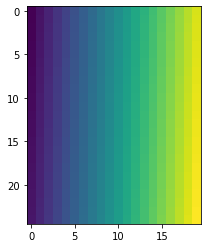

In [15]:
plt.imshow(t)

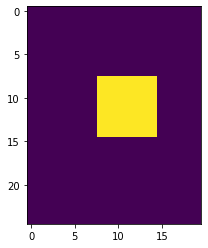

In [18]:
plt.imshow(X)

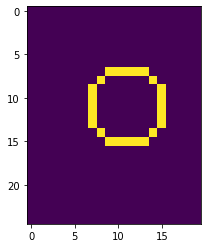

In [19]:
plt.imshow(evolve(X))

In [22]:
lattice2, statemap = evolvemap(X)

In [ ]:
lattice2, statemap = evolvemap(X)

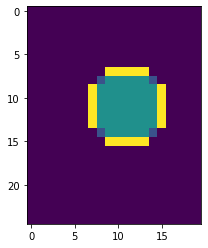

In [23]:
plt.imshow(statemap)

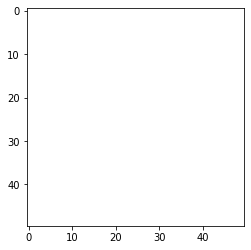

In [ ]:
Y =  generate_lattice(50,0.5)
fig = plt.figure()
camera = Camera(fig)
for i in range(1,100):
    plt.imshow( Y, cmap = 'magma')
    Y =  evolve(Y)
    camera.snap()
animation = camera.animate()
animation.save('gameoflife3.gif', writer = 'pillow')

In [ ]:
from google.colab import files
files.download( "gameoflife3.gif" )    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Viterbi Approach


Let's say the hidden states are the origins of a specific state in the lattice, i.e. the transitions that produce an observable present, namely state the four conway rules :

* Stasis = $S$
* Overpopulation = $O$
* Underpopulation = $U$
* Reproduction = $R$

Notice the transitions associated with each hidden state, and the fifth transition $Z$:

* $S :\, 1 \rightarrow 1$
* $O :\, 1 \rightarrow 0$
* $U :\, 1 \rightarrow 0$ 
* $R :\, 0 \rightarrow 1$
* $Z :\, 0 \rightarrow 0$


Let's define the sets  of $3 \, \times \, 3$ matrixes associated with each hidden state.



In [ ]:
matrices = []
for a1 in [0,1]:
  for a2 in [0,1]:
    for a3 in [0,1]:
      for a4 in [0,1]:
        for a5 in [0,1]:
          for a6 in [0,1]:
            for a7 in [0,1]:
              for a8 in [0,1]:
                for a9 in [0,1]:
                  matrices.append(np.array([[a1, a2, a3],[a4, a5, a6],[a7, a8, a9]]))
      


In [ ]:
matrices[230]

[[0, 1, 1], [1, 0, 0], [1, 1, 0]]

In [ ]:
matrixs = {}

In [ ]:
np.sum(matrices[230])

5

In [ ]:
matrizS = []
matrizO = []
matrizU = []
matrizR = []
matrizZ = []

for i in matrices:
  if i[1][1] == 1:
    if (np.sum(i)-1) in [2,3]:
      matrizS.append(i)
    if (np.sum(i)-1) in [0,1]:
      matrizU.append(i)
    if (np.sum(i)-1) > 3:
      matrizO.append(i)
  if i[1][1] == 0:
    if np.sum(i) == 3:
      matrizR.append(i)
    else: matrizZ.append(i)

In [ ]:
print(len(matrices))
print(len(matrizS))
print(len(matrizO))
print(len(matrizU))
print(len(matrizR))
print(len(matrizZ))

matriz = [matrizZ,matrizS,matrizO,matrizU,matrizR]

512
84
163
9
56
200


For implementing viterbi we must write the emission matrix and the transition matrix!

##Transition Matrix 

Transition matrix will measure the probability of transitions between hidden states!

 1 - stasis - $S$

 2 - overpopulation - $O$

 3 - underpopulation - $U$

 4 - reproduction - $R$

 0 - nothingness - $Z$

First we'll do using the abstract states, then the $3 \times 3$ matrix configurations associated with each state

In [ ]:
#state dictionary

SD = {'S','O', 'U','R','Z' }

In [ ]:
#TM = {'S|S':0, 'O|S':0, 'U|S':0, 'R|O':0, 'Z|O':0, 'R|U':0, 'Z|U':0,
#      'U|R':0, 'O|R':0, 'S|R':0, 'R|Z':0, 'Z|Z':0 }
TM = {'S':{'S':0, 'O':0 , 'U':0}, 'O':{'R':0, 'Z':0},'U':{'R':0, 'Z':0},
      'R':{'S':0, 'O':0 , 'U':0}, 'Z':{'R':0,'Z':0}}
TMa = {}

##Emission Matrix

Emission matrix will carry the probabilities of observing the living (1) or dead state (0) given the 5 hidden states

In [ ]:
EM = {'S': {0:0, 1:1}, 'O':{0:0, 1:1},'U':{0:0, 1:1},
      'R':{0:1, 1:0}, 'Z':{0:1, 1:0}}
EMa = {}

In [ ]:
Y = np.copy(X0)

temporal transition!

In [ ]:
Y, statemap0 = evolvemap(Y)
x = np.shape(Y)[0]
y = np.shape(Y)[1]
for i in range(0,1000):
  Y, statemap = evolvemap(Y)
  for j in range(x):
    for l in range(y):
      if statemap0[j][l]==1 and statemap[j][l]==1: TM['S']['S'] +=1
      if statemap0[j][l]==1 and statemap[j][l]==2: TM['S']['O'] +=1
      if statemap0[j][l]==1 and statemap[j][l]==3: TM['S']['U'] +=1
      if statemap0[j][l]==2 and statemap[j][l]==4: TM['O']['R'] +=1
      if statemap0[j][l]==2 and statemap[j][l]==0: TM['O']['Z'] +=1
      if statemap0[j][l]==3 and statemap[j][l]==4: TM['U']['R'] +=1
      if statemap0[j][l]==3 and statemap[j][l]==0: TM['U']['Z'] +=1
      if statemap0[j][l]==4 and statemap[j][l]==1: TM['R']['S'] +=1
      if statemap0[j][l]==4 and statemap[j][l]==2: TM['R']['O'] +=1
      if statemap0[j][l]==4 and statemap[j][l]==3: TM['S']['S'] +=1
      if statemap0[j][l]==0 and statemap[j][l]==4: TM['Z']['R'] +=1
      if statemap0[j][l]==0 and statemap[j][l]==0: TM['Z']['Z'] +=1
  statemap0 = np.copy(statemap)
  


spacial transition!

In [ ]:
Y, statemap0 = evolvemap(Y)
x = np.shape(Y)[0]
y = np.shape(Y)[1]
for i in listadeY:
  for j in range(x):
    for l in range(y):
      if statemap0[j][l]==1 and statemap[j][l+1]==1: TM['S']['S'] +=1
      if statemap0[j][l]==1 and statemap[j][l]==2: TM['S']['O'] +=1
      if statemap0[j][l]==1 and statemap[j][l]==3: TM['S']['U'] +=1
      if statemap0[j][l]==2 and statemap[j][l]==4: TM['O']['R'] +=1
      if statemap0[j][l]==2 and statemap[j][l]==0: TM['O']['Z'] +=1
      if statemap0[j][l]==3 and statemap[j][l]==4: TM['U']['R'] +=1
      if statemap0[j][l]==3 and statemap[j][l]==0: TM['U']['Z'] +=1
      if statemap0[j][l]==4 and statemap[j][l]==1: TM['R']['S'] +=1
      if statemap0[j][l]==4 and statemap[j][l]==2: TM['R']['O'] +=1
      if statemap0[j][l]==4 and statemap[j][l]==3: TM['S']['S'] +=1
      if statemap0[j][l]==0 and statemap[j][l]==4: TM['Z']['R'] +=1
      if statemap0[j][l]==0 and statemap[j][l]==0: TM['Z']['Z'] +=1
  statemap0 = np.copy(statemap)
  

In [ ]:
Y = evolve(Y)
x = np.shape(Y)[0]
y = np.shape(Y)[1]
for n in range(0,1000):
  Y, statemap0 = evolvemap(Y)
  for i in range(x):
    for j in range(y):
      for k in [0,1,2,3,4]:
        for l in matriz[k]:
          if np.all(Y[i-1:i+2,j-1:j+2]==l):
            TMa = {}

      
  statemap0 = np.copy(statemap)

In [ ]:
np.all(Y[0:3,1:4] == matrizZ[0])

True

In [ ]:
S=[0,1,2,3,4]

##Viterbi algorithm

implementing Viterbi algorithm



In [ ]:
def viterbi(O,S,P,Y,TM,EM):
  """ viterbi algithm
  O - > espaço de observação - [0,1] ou 3x3
  S - > espaço de estados - [SOURZ] ou 3x3
  P - > probabilidade do estado inicial
  Y - > sequencia de observacoes
  TM - > matriz de transicoes (A)
  EM - > matriz de emissoes (B)
  """
  
  for s in S:
    T1[s,1] = P[s][] * EM[s][y1]
    T2[s,1] = 0
  
  for j in Y: #comeca na segunda observação T é o tamanho de Y
    for s in S:
      T1[s,j] = max(k) ( T1[k,j-1]* TM[k][i] * EM[s][j])
      T2[s,j] = argmax(k) ( T1[k,j-1]* TM[k][i] * EM[s][j])

  x[T] = argmax(k) (T1[k,T]) 
 
  # agora na ordem inversa

  for j in reverse(Y):
    x[j-1] = argmax(k) (T2[x[j],j])
  
  return x

#visualizing training set

In [26]:
import pandas as pd

In [28]:
df = pd.read_csv('train.csv')

In [29]:
np.shape(df)

(50000, 1252)

In [33]:
df['delta'].unique()

array([3, 4, 5, 1, 2])

In [45]:
listastart = ['start_' + str(i) for i in range(0,625)]
listastop = ['stop_' + str(i) for i in range(0,625)]

In [46]:
starts = df[listastart]
stops = df[listastop]

In [59]:
starts['start_0'][0]

0

In [61]:
startssquare = []
for i in range(50000):
  x = np.zeros((25,25))
  for j in range(25):
    for k in range(25):
      x[j][k] = starts['start_'+ str(j*25 + k)][i]
  startssquare.append(x)


In [ ]:
stopssquare = []
for i in range(50000):
  x = np.zeros((25,25))
  for j in range(25):
    for k in range(25):
      x[j][k] = stops['stop_'+ str(j*25 + k)][i]
  stopssquare.append(x)

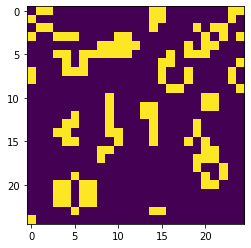

In [65]:
plt.imshow(startssquare[3])

In [42]:
df.head()

,id,delta,start_0,start_1,start_2,start_3,start_4,start_5,start_6,start_7,start_8,start_9,start_10,start_11,start_12,start_13,start_14,start_15,start_16,start_17,start_18,start_19,start_20,start_21,start_22,start_23,start_24,start_25,start_26,start_27,start_28,start_29,start_30,start_31,start_32,start_33,start_34,start_35,start_36,start_37,...,stop_585,stop_586,stop_587,stop_588,stop_589,stop_590,stop_591,stop_592,stop_593,stop_594,stop_595,stop_596,stop_597,stop_598,stop_599,stop_600,stop_601,stop_602,stop_603,stop_604,stop_605,stop_606,stop_607,stop_608,stop_609,stop_610,stop_611,stop_612,stop_613,stop_614,stop_615,stop_616,stop_617,stop_618,stop_619,stop_620,stop_621,stop_622,stop_623,stop_624
0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,4,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,3,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,3,5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,4,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


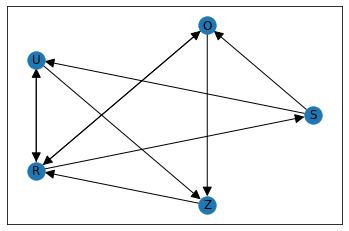

In [ ]:
import networkx as nx

G = nx.DiGraph()
G.add_node('S')
G.add_node('O')
G.add_node('U')
G.add_node('R')
G.add_node('Z')
G.add_edge('S','S')
G.add_edge('S','O')
G.add_edge('S','U')
G.add_edge('O','R')
G.add_edge('O','Z')
G.add_edge('U','R')
G.add_edge('U','Z')
G.add_edge('R','S')
G.add_edge('R','O')
G.add_edge('R','U')
G.add_edge('Z','R')
G.add_edge('Z','Z')
#G.add_edges_from()
nx.draw_networkx(G, pos=nx.circular_layout(G) ,arrowsize=20)

In [ ]:
from networkx.drawing.nx_agraph import write_dot

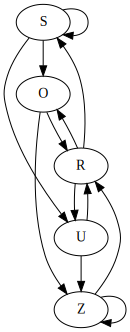

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = Digraph('G')
G.edge('S','S')
G.edge('S','O')
G.edge('S','U')
G.edge('O','R')
G.edge('O','Z')
G.edge('U','R')
G.edge('U','Z')
G.edge('R','S')
G.edge('R','O')
G.edge('R','U')
G.edge('Z','R')
G.edge('Z','Z')
G

In [ ]:
center = {}
neighbours = {}


center['S'] = 1
neighbours['S'] = [[1,1,0,0,0,0,0,0],
                  [1,1,1,0,0,0,0,0]]

center['O'] = 1
neighbours['O'] = [[1,1,1,1,0,0,0,0]
              ,[1,1,1,1,1,0,0,0]
              ,[1,1,1,1,1,1,0,0]
              ,[1,1,1,1,1,1,1,0]
              ,[1,1,1,1,1,1,1,1]]

center['U'] = 1
neighbours['U'] = [[0,0,0,0,0,0,0,0]
              ,[1,0,0,0,0,0,0,0]]

center['R'] = 0
neighbours['R'] = [[1,1,1,0,0,0,0,0]]

